
# **NAMA : Arif Muhammad Ibadurahman**
# **LINK : https://www.dicoding.com/users/arifmuhammaad/academies**

In [2]:
#import beberapa library yang diperlukan
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [21]:
# Fungsi untuk membaca dataset kolom dan baris nya
def read_dataset(file_path='bbc-text.csv'):
    df = pd.read_csv(file_path)

    # Melihat jumlah kolom dan baris data
    print(f'Data size:\n{df.shape[0]} rows\n{df.shape[1]} columns\n')

    # Menampilkan informasi data yang digunakan
    df.info()

    return df

# Panggil fungsi untuk membaca dataset
data_frame = read_dataset()


Data size:
2225 rows
2 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [22]:
# Proses pengubahan category menjadi True dan False
def one_hot_encode(df):
    category = pd.get_dummies(df.category)
    new_df = pd.concat([df, category], axis=1)
    new_df = new_df.drop(columns='category')
    num_classes = len(category.columns)
    return new_df
# Lakukan one-hot encoding di luar fungsi
encoded_data_frame = one_hot_encode(data_frame)
print(encoded_data_frame)

                                                   text  business  \
0     tv future in the hands of viewers with home th...         0   
1     worldcom boss  left books alone  former worldc...         1   
2     tigers wary of farrell  gamble  leicester say ...         0   
3     yeading face newcastle in fa cup premiership s...         0   
4     ocean s twelve raids box office ocean s twelve...         0   
...                                                 ...       ...   
2220  cars pull down us retail figures us retail sal...         1   
2221  kilroy unveils immigration policy ex-chatshow ...         0   
2222  rem announce new glasgow concert us band rem h...         0   
2223  how political squabbles snowball it s become c...         0   
2224  souness delight at euro progress boss graeme s...         0   

      entertainment  politics  sport  tech  
0                 0         0      0     1  
1                 0         0      0     0  
2                 0         0      1

In [23]:
# function to get all of strings from dataframe column, and used lower function here.
def get_all_str(df):
    sentence = ''
    for i in range(len(df)):
        sentence += df['text'][i]
    sentence = sentence.lower()
    return sentence

# fungsi untuk mendapatkan semua kata dari text, menggunakan library nltk.RegexpTokenizer
def get_word(text):
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
    return result

# function to add stopwords to nltp stopword list.
def stopword_list(stop):
    lst = stopwords.words('english')
    for stopword in stop:
        lst.append(stopword)
    return lst

# function to remove stopwords from list.
def remove_stopword(stopwords, lst):
    stoplist = stopword_list(stopwords)
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist]
    return cleanwordlist

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
string = get_all_str(encoded_data_frame)
words = get_word(string)
removed = remove_stopword('1',words)
print(removed[:10])

['tv', 'future', 'hands', 'viewers', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition']


# Validation set sebesar 20% dari total dataset.

In [26]:
#membuat variabel untuk isi text dan label/kategori
text = encoded_data_frame['text'].values
label = encoded_data_frame[['business', 'entertainment' , 'politics',  'sport',  'tech' ]].values

In [27]:
#menggunakan module Sklearn untuk membagi data menjadi
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2, random_state=42)
max_len = max([len(s.split()) for s in text_train])
print(max_len)

3570


# Harus menggunakan fungsi tokenizer.

In [28]:
#proses tokenizer
tokenizer = Tokenizer(num_words=3570, oov_token='<oov>', filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(text_train)

#sequensi sample
sekuens_train = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)

#padding sequen
padded_train = pad_sequences(sekuens_train, padding='post', maxlen=max_len, truncating='post')
padded_test = pad_sequences(sekuens_test, padding='post', maxlen=max_len, truncating='post')

# Harus menggunakan LSTM dalam arsitektur model.

# Harus menggunakan model sequential.

# Harus menggunakan Embedding.

In [29]:
#proses modelling untuk sequential
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=3570, output_dim=64,input_length=max_len),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3570, 64)          228480    
                                                                 
 lstm_1 (LSTM)               (None, 3570, 128)         98816     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)              

In [31]:
#compile dan fit model dengan adam optimizer dan loss categorical crossentropy
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [35]:
models_dir = 'save_models'
if not os.path.exists(models_dir):
  os.makedirs(models_dir)

checkpointer = ModelCheckpoint(filepath=os.path.join(models_dir, 'model.hdf5'),
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.75 and logs.get('val_accuracy')>0.75):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 75%!")

stop_callback = myCallback()

callbacks = [stop_callback, checkpointer, reduce_learning_rate]

# Akurasi dari model minimal 75% pada train set dan validation set.

In [33]:
#menampilkan history berdasarkan epoch
history = model.fit(padded_train, label_train, epochs=50, validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.43820, saving model to save_models/model.hdf5
56/56 - 402s - loss: 1.3123 - accuracy: 0.4854 - val_loss: 1.4781 - val_accuracy: 0.4382 - lr: 0.0010 - 402s/epoch - 7s/step
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy improved from 0.43820 to 0.46966, saving model to save_models/model.hdf5
56/56 - 398s - loss: 0.3008 - accuracy: 0.9107 - val_loss: 1.2580 - val_accuracy: 0.4697 - lr: 0.0010 - 398s/epoch - 7s/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.46966 to 0.73034, saving model to save_models/model.hdf5
56/56 - 382s - loss: 0.0664 - accuracy: 0.9815 - val_loss: 0.9902 - val_accuracy: 0.7303 - lr: 0.0010 - 382s/epoch - 7s/step
Epoch 4/50

The accuracy of the training set and the validation set has reached > 90%!

Epoch 4: val_accuracy improved from 0.73034 to 0.83596, saving model to save_models/model.hdf5
56/56 - 400s - loss: 0.0177 - accuracy: 0.9972 - val_loss: 0.6589 - val_accuracy: 0.8360 - lr: 0.0010 - 400s/epoch - 7s/step


In [34]:
model.evaluate(padded_test, label_test)

14/14 [==============================] - 25s 2s/step - loss: 0.6589 - accuracy: 0.8360


[0.6589277982711792, 0.8359550833702087]

In [36]:
# Fungsi untuk melatih dan menguji model
def train_and_evaluate_model():
    df = read_dataset()
    padded_sequences, tokenizer = preprocess_text(df)

    labels = df['label']  # Gantilah 'label' dengan nama kolom target pada dataset Anda

    # Membagi dataset
    X_train, X_val, y_train, y_val = split_dataset(padded_sequences, labels)

    # Membuat dan melatih model
    model = create_lstm_model(len(tokenizer.word_index) + 1, 50, len(X_train[0]))
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

    # Evaluasi model
    _, train_acc = model.evaluate(X_train, y_train)
    _, val_acc = model.evaluate(X_val, y_val)

    print(f'Training Accuracy: {train_acc*100:.2f}%')
    print(f'Validation Accuracy: {val_acc*100:.2f}%')

    # Visualisasi akurasi dan loss
    plot_history(history)

    # Confusion Matrix
    y_pred = model.predict_classes(X_val)
    plot_confusion_matrix(y_val, y_pred)

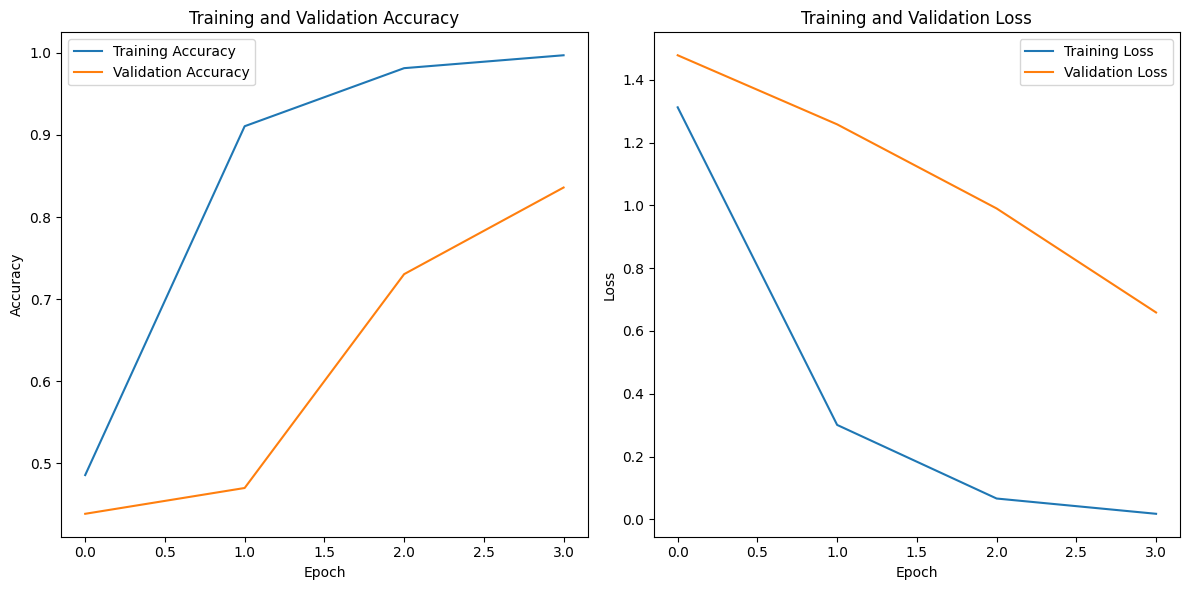

In [37]:
import matplotlib.pyplot as plt

# Melatih model
#history = model.fit(padded_train, label_train, epochs=50, validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

# Menampilkan grafik hasil pelatihan
plt.figure(figsize=(12, 6))

# Grafik akurasi pelatihan dan validasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Grafik loss pelatihan dan validasi
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
